# Analysing Zomato Restaurants in Mumbai

Dataset link : https://www.kaggle.com/datasets/sleepyowl007/zomato-mumbai-dataset

> Let's start!
> * Less memory usage - Dropping not required column and changing data types
> * Cleaning columns and giving meaningfull values to them
> * Analysing the data
> * Generating reports

In [1]:
#importing packages
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Reading dataset
df = pd.read_csv('../input/zomato-mumbai-dataset/Zomato_Mumbai_Dataset.csv',delimiter='|')
df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [3]:
#No of rows vs columns
df.shape

(15081, 12)

In [4]:
#Initial memory usage
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Columns: 12 entries, NAME to VOTES
dtypes: object(12)
memory usage: 1.4+ MB


In [5]:
#drop Duplicates and null values
df.dropna(0,'any',inplace=True)

df.drop_duplicates(inplace=True,keep=False)

df.drop(columns=['CITY','URL','PAGE NO','TIMING','VOTES'],inplace=True)

df.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING_TYPE,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Very Good,4.4
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Very Good,4.2
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,Very Good,4.3
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,Veľmi dobré,4.4


In [6]:
#Rename columns
df.rename({'CUSINE_CATEGORY' : 'CUISINE_CATEGORY', 'CUSINE TYPE' : 'OUTLET_TYPE', 'RATING_TYPE': 'REVIEWS'},axis=1, inplace=True)

df.head()

,NAME,PRICE,CUISINE_CATEGORY,REGION,OUTLET_TYPE,REVIEWS,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Very Good,4.4
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Very Good,4.2
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,Very Good,4.3
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,Veľmi dobré,4.4


In [7]:
#Cleaning Rating column
df['RATING'] = df.apply(lambda x: 0 if x['RATING'] in ['-','NEW','Opening'] else x['RATING'], axis=1)
df['RATING'].unique()

array(['4.9', '4.4', '4.2', '4.3', '4.5', '4.7', '4.0', '4.6', '4.1',
       '3.9', '3.8', 0, '3.6', '3.4', '3.0', '3.7', '4.8', '3.3', '3.5',
       '3.2', '3.1', '2.7', '2.5', '2.8', '2.6', '2.3', '2.9', '2.4',
       '2.1', '2.2', '1.8', '2.0'], dtype=object)

In [8]:
#Cleaning PRICE column
df['PRICE'].unique()
#already cleaned

array(['1200', '400', '1800', '1000', '800', '1300', '1500', '600',
       '1400', '1100', '2000', '350', '900', '700', '500', '1600', '150',
       '300', '550', '450', '650', '750', '250', '200', '850', '100',
       '2500', '1450', '180', '950', '1700', '1900', '2600', '2400',
       '3000', '1250', '3200', '505', '2200', '1050', '1650', '1350',
       '50', '920', '1150', '1550', '3500', '398', '5000', '120', '220',
       '160', '340', '5', '480', '2100', '580', '1850', '249', '80',
       '2300', '360', '3502', '248', '2700', '0'], dtype=object)

In [9]:
#Cleaning REVIEWS column
df['REVIEWS'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
df['REVIEWS'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace=True)
df['REVIEWS'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
df['REVIEWS'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
df['REVIEWS'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
df['REVIEWS'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)
df['REVIEWS'].replace(to_replace=['None'] , value='Not Rated', inplace=True)
df['REVIEWS'].unique()

array(['Excellent', 'Very Good', 'Good', 'Not rated', 'Not Rated',
       'Average', 'Poor', 'Very Poor'], dtype=object)

In [10]:
#Cleaning REGION Column - 1
df['REGION'] = df['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)
df['REGION'] = df['REGION'].str.replace(' West| west| East| east','',regex=True)

In [11]:
#Cleaning REGION column - 2, replacing with base region
df['REGION'] = df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area|Mahakali','Andheri',regex=True)
df['REGION'] = df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
df['REGION'] = df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
df['REGION'] = df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
df['REGION'] = df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
df['REGION'] = df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
df['REGION'] = df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
df['REGION'] = df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
df['REGION'] = df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
df['REGION'] = df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
df['REGION'] = df['REGION'].str.replace('Kamothe','Sion',regex=True)
df['REGION'] = df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

In [12]:
df['REGION'].unique()

array(['Bandra', 'Mahim', 'Juhu', 'Lower Parel', 'Marol', 'Andheri',
       'Dadar', 'Khar', 'Mumbai Central', 'Bhandup', 'Malad', 'Powai',
       'Chembur', 'Goregaon', 'Vile Parle', 'CBD Belapur', 'Ghansoli',
       'Borivali', 'Vasai', 'Thane', 'Worli', 'Parel', 'Colaba',
       'Nariman Point', 'Santacruz', 'Mulund', 'Kandivali', 'Airoli',
       'Mira Road', 'Fort', 'Jogeshwari', 'Vashi', 'Ghatkopar',
       'Sakinaka', 'Byculla', 'Kalyan', 'Bhayandar', 'Charni Road',
       'Chandivali', 'Kurla', 'Mohammad Ali Road', 'Kharghar', 'Matunga',
       'Ulhasnagar', 'Navi Mumbai', 'Dahisar', 'Chowpatty', 'Panvel',
       'Sion', 'Tardeo', 'Mazgaon', 'Prabhadevi', 'Sanpada', 'Virar',
       'Girgaum', 'Mumbra', 'Marve', 'Chakala', 'Marine Lines',
       'Mahalaxmi', 'Nalasopara', 'Kalwa', 'Nerul', 'Grant Road',
       'Breach Candy', 'Churchgate', 'Vikhroli', 'Kalbadevi', 'Dombivali',
       'Kemps Corner', 'Malabar Hill', 'Kalamboli', 'Wadala', 'Alibaug',
       'Peddar Road', 'Amberna

In [13]:
#Checking if null values
df.isnull().sum()

NAME                0
PRICE               0
CUISINE_CATEGORY    0
REGION              0
OUTLET_TYPE         0
REVIEWS             0
RATING              0
dtype: int64

In [14]:
#Change datatypes of columns
df = df.astype({'NAME':str, 'PRICE':int, 'CUISINE_CATEGORY':str, 'OUTLET_TYPE':'category','REVIEWS':'category', 'RATING':float})

In [15]:
#Less memory usage
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14072 entries, 0 to 15079
Columns: 7 entries, NAME to RATING
dtypes: category(2), float64(1), int64(1), object(3)
memory usage: 688.2+ KB


In [16]:
#Finding price ranges for restaurants
df['PRICE'] = pd.cut(df['PRICE'], [0,500,1000,3000,5000], labels=['0-500','500-1000','1000-3000','3000-5000'])
df['PRICE'].value_counts()

0-500        9947
500-1000     3511
1000-3000     584
3000-5000       4
Name: PRICE, dtype: int64

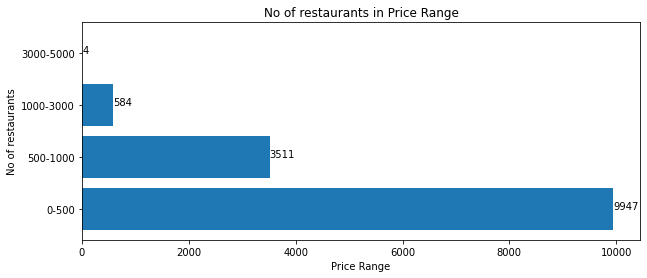

In [17]:
#Plotting Graph between no. of restaurant and price range
x = df['PRICE'].value_counts().index
y = df['PRICE'].value_counts().values
plt.figure(figsize=(10, 4))
plt.barh(x,y)
plt.title("No of restaurants in Price Range")
plt.xlabel("Price Range")
plt.ylabel("No of restaurants")
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

In [18]:
#Grouping Rating in three categories
df['RATING'] = pd.cut(df['RATING'], [2,3,4,5], labels=['Low','Medium','High'])
df['RATING'].value_counts()

Medium    8248
Low       1670
High       841
Name: RATING, dtype: int64

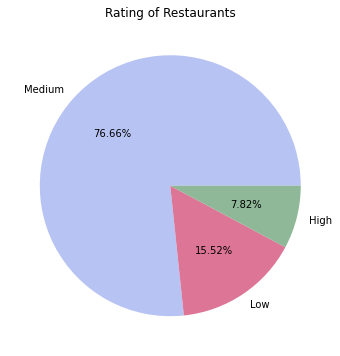

In [19]:
#Plotting Graph for percentage of restaurants as per ratings
x = df['RATING'].value_counts().index
y = df['RATING'].value_counts().values
plt.figure(figsize=(6, 6))
plt.pie(y,labels=x,colors=['#B7C3F3', '#DD7596', '#8EB897'],autopct='%1.2f%%')
plt.title("Rating of Restaurants")
plt.show()

In [20]:
#Top 10 types of outlets
df['OUTLET_TYPE'].value_counts().nlargest(10)

Quick Bites       5239
Casual Dining     4711
none              1769
Bakery             775
Dessert Parlor     584
Café               348
Sweet Shop         163
Beverage Shop      130
Food Court          78
Dhaba               54
Name: OUTLET_TYPE, dtype: int64

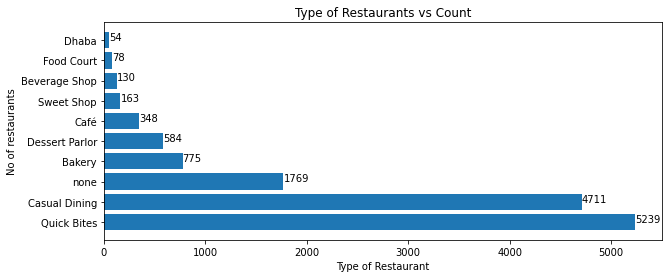

In [21]:
#Plotting Graph between no. of restaurant and type of outlet
x = df['OUTLET_TYPE'].value_counts().nlargest(10).index
y = df['OUTLET_TYPE'].value_counts().nlargest(10).values
plt.figure(figsize=(10, 4))
plt.title("Type of Restaurants vs Count")
plt.xlabel("Type of Restaurant")
plt.ylabel("No of restaurants")
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

#Alternate way to count cuisines
from collections import Counter
types = df['CUISINE_CATEGORY'].str.split(',')
c = Counter()
for t in types:
    c.update(t)
c = c.most_common(5)  

In [22]:
#Finding all the different type of cuisines served
df1 = df['CUISINE_CATEGORY'].str.split(',')

#Top 5 Cuisines served
xy = df1.explode().value_counts().nlargest(5)

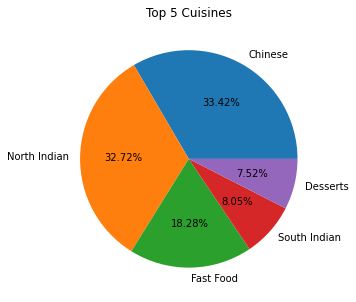

In [23]:
#How many percentage of restaurants serves top 5 cuisines
x = xy.index
y = xy.values/df.count().NAME
plt.figure(figsize=(5, 5))
plt.pie(y,labels=x,autopct='%1.2f%%')
plt.title("Top 5 Cuisines")
plt.show()

In [24]:
#Restaurants reviews count
df['REVIEWS'].value_counts()

Average      5113
Good         4344
Not rated    2359
Very Good    1147
Not Rated     952
Excellent      96
Poor           57
Very Poor       4
Name: REVIEWS, dtype: int64

In [25]:
#Top 10 Regions with most number of restaurants
df['REGION'].value_counts().nlargest(10)

Andheri      1158
Thane         987
Mira Road     556
Malad         492
Kandivali     485
Bandra        463
Goregaon      440
Dombivali     399
Borivali      392
Chembur       355
Name: REGION, dtype: int64

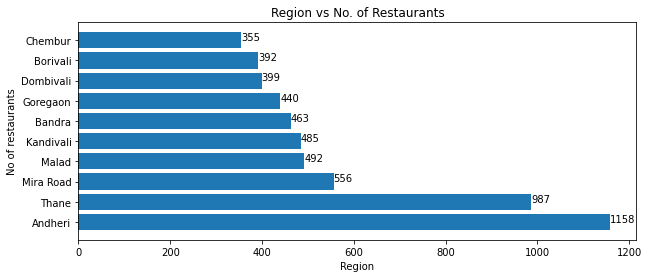

In [26]:
#Region vs No of restaurants.
x = df['REGION'].value_counts().nlargest(10).index
y = df['REGION'].value_counts().nlargest(10).values
plt.figure(figsize=(10, 4))
plt.title("Region vs No. of Restaurants")
plt.ylabel("No of restaurants")
plt.xlabel("Region")
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

> Thank you for coming upto here!
> 
> Please feel free to provide suggestion for improvisation.
